In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

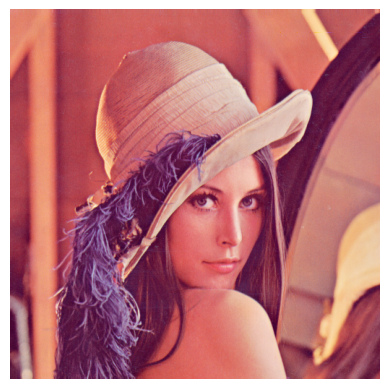

In [2]:
lena = PIL.Image.open('images/lena.tif')
lena = np.array(lena)
plt.imshow(lena)
plt.axis('off')
plt.show()

In [3]:
from utils import assign_centroids

# Sanity check
X = np.array([[1, 2], [1, -1], [5, 6], [7, 8], [9, 10]])
centroids = np.array([[1, 2], [8, 8]])

idx = assign_centroids(X, centroids)
print(idx)

[0 0 1 1 1]


In [4]:
from utils import update_centroids

# Sanity check
centroids = update_centroids(X, idx, 2)
print(centroids)

[[1.  0.5]
 [7.  8. ]]


In [5]:
from utils import kmeans
cenroids, idx, J = kmeans(X, 2)
print(centroids)
print(idx)
print(J)

[[1.  0.5]
 [7.  8. ]]
[0 0 1 1 1]
4.1000000000000005


In [6]:
results = []
for k in range(10):
    centroids, idx, J = kmeans(X, 2)
    results.append({
        'centroids': centroids,
        'idx': idx,
        'J': J
    })

# Sort the results by J to take the the set-up with the lowest distortion
sort_result = sorted(results, key=lambda x: x['J'])
best_result = sort_result[0]
print(best_result['J'])
print(best_result['centroids'])

4.1000000000000005
[[7.  8. ]
 [1.  0.5]]


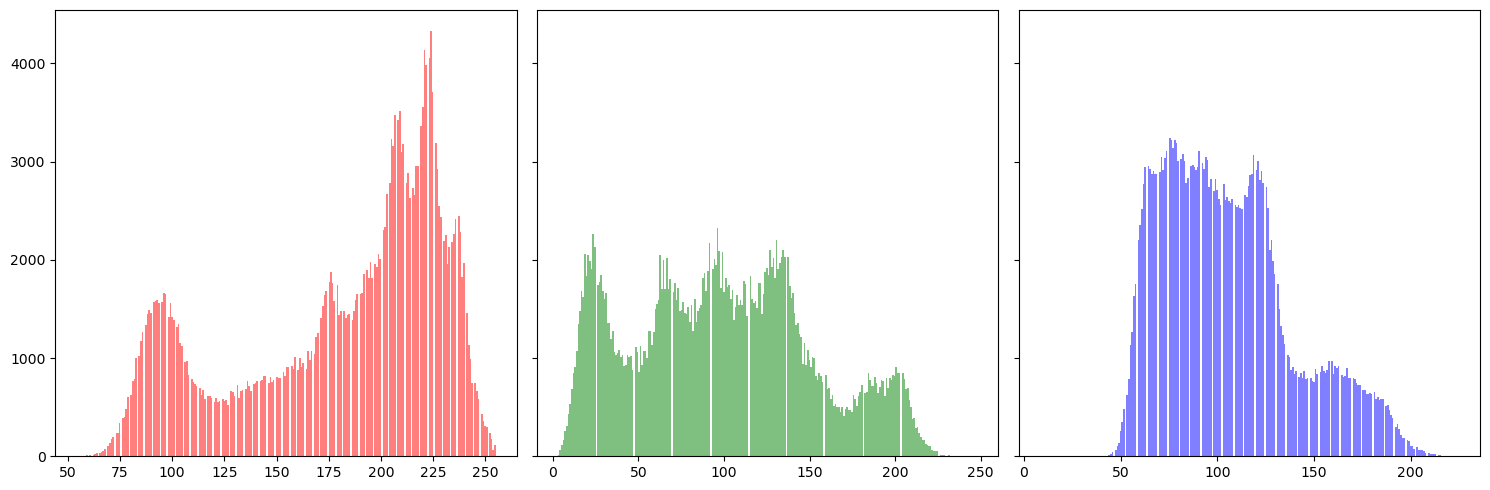

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)
colors = ['r', 'g', 'b']
for i in range(3):
    axs[i].hist(lena[:, :, i].ravel(), bins=256, color=colors[i], alpha=0.5)

plt.show()

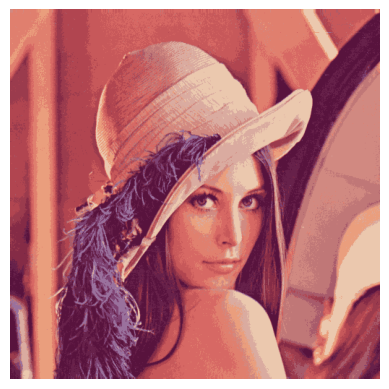

In [8]:
lena_vectors = lena.reshape(-1, 3)
K = 16
centroids, idx, J = kmeans(lena_vectors, K)
lena_quantized = centroids[idx].reshape(lena.shape)
plt.imshow(lena_quantized/255)
plt.axis('off')
plt.show()

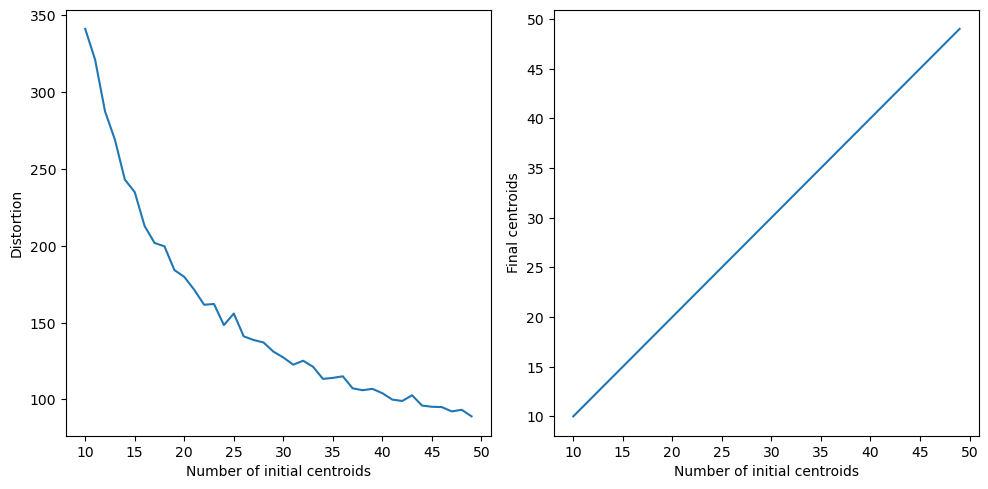

In [13]:
Ks = range(10, 50)
results = []
for K in Ks:
    centroids, idx, J = kmeans(lena_vectors, K)
    results.append({
        'centroids': centroids,
        'idx': idx,
        'J': J
    })
final_centroids_count = [len(np.unique(r['idx'])) for r in results]
fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)
axs[0].plot(Ks, [r['J'] for r in results])
axs[0].set_xlabel('Number of initial centroids')
axs[0].set_ylabel('Distortion')

axs[1].plot(Ks, final_centroids_count)
axs[1].set_xlabel('Number of initial centroids')
axs[1].set_ylabel('Final centroids')
plt.show()

There is no elbow here :)